In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [3]:
df = pd.read_csv('data/friday_feeling_df.csv')

In [47]:
df['Dolartoday']

0        8.333300e-03
1        8.334931e-03
2        8.336561e-03
3        8.338192e-03
4        8.339822e-03
             ...     
51572    4.820000e+06
51573    4.820000e+06
51574    4.820000e+06
51575    4.820000e+06
51576    4.820000e+06
Name: Dolartoday, Length: 51577, dtype: float64

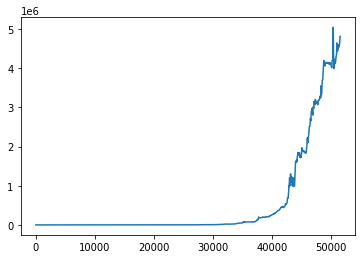

In [5]:
plt.plot(df['Dolartoday'])

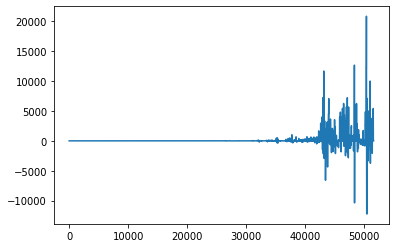

In [30]:
plt.plot(df['Dolartoday'].diff().dropna())

In [25]:
y_log = np.log(df['Dolartoday'])

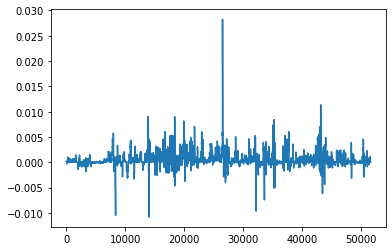

In [32]:
plt.plot(y_log.diff())

In [10]:
df.dtypes


date                           object
Stock_Market                  float64
Deposit_Interest_Rate         float64
Interest_Rate                 float64
Money_Supply_M3               float64
Central_Bank_Balance_Sheet    float64
Crude_Oil_Production          float64
Crude_Oil_Rig                 float64
Money_Supply_M0               float64
Foreign_Exchange_Reserve      float64
External_Debt                 float64
Inflation_Rate                float64
Money_Supply_M2               float64
Inflation_Rate_Mom            float64
Private_Sector_Credit         float64
Consumer_Price_Index_CPI      float64
CPI_Transportation            float64
Money_Supply_M1               float64
Banks_Balance_Sheet           float64
Dolartoday                    float64
BM (BsS)                      float64
M2 (BsS)                      float64
dtype: object

In [12]:
feature_list = ['Stock_Market', 'Deposit_Interest_Rate', 'Interest_Rate',
       'Money_Supply_M3', 'Central_Bank_Balance_Sheet', 'Crude_Oil_Production',
       'Crude_Oil_Rig', 'Money_Supply_M0', 'Foreign_Exchange_Reserve',
       'External_Debt', 'Inflation_Rate', 'Money_Supply_M2',
       'Inflation_Rate_Mom', 'Private_Sector_Credit',
       'Consumer_Price_Index_CPI', 'CPI_Transportation', 'Money_Supply_M1',
       'Banks_Balance_Sheet', 'BM (BsS)', 'M2 (BsS)']

In [21]:
df['Dolartoday'].corr(df['Money_Supply_M3'])

0.9864028320930173

In [13]:
feature_list

['Stock_Market',
 'Deposit_Interest_Rate',
 'Interest_Rate',
 'Money_Supply_M3',
 'Central_Bank_Balance_Sheet',
 'Crude_Oil_Production',
 'Crude_Oil_Rig',
 'Money_Supply_M0',
 'Foreign_Exchange_Reserve',
 'External_Debt',
 'Inflation_Rate',
 'Money_Supply_M2',
 'Inflation_Rate_Mom',
 'Private_Sector_Credit',
 'Consumer_Price_Index_CPI',
 'CPI_Transportation',
 'Money_Supply_M1',
 'Banks_Balance_Sheet',
 'BM (BsS)',
 'M2 (BsS)']

In [14]:
important_features = []
less_important_features = []
for i in feature_list:
    if df['Dolartoday'].corr(df[i])>.6:
        important_features.append(i)
    else:
        less_important_features.append(i)

In [15]:
important_features

['Stock_Market',
 'Deposit_Interest_Rate',
 'Interest_Rate',
 'Money_Supply_M3',
 'Central_Bank_Balance_Sheet',
 'Money_Supply_M0',
 'Money_Supply_M2',
 'Private_Sector_Credit',
 'Consumer_Price_Index_CPI',
 'CPI_Transportation',
 'Money_Supply_M1',
 'Banks_Balance_Sheet',
 'BM (BsS)',
 'M2 (BsS)']

In [16]:
less_important_features

['Crude_Oil_Production',
 'Crude_Oil_Rig',
 'Foreign_Exchange_Reserve',
 'External_Debt',
 'Inflation_Rate',
 'Inflation_Rate_Mom']

In [24]:
adfuller(df['Dolartoday'].diff().dropna())

(-26.262424698001595,
 0.0,
 58,
 51517,
 {'1%': -3.4304769411235925,
  '5%': -2.861596105406013,
  '10%': -2.566799863045707},
 719943.0314193827)

In [36]:
y_stat = y_log.diff().dropna()

In [35]:
adfuller(y_log.diff().dropna())

(-20.6981651066676,
 0.0,
 58,
 51517,
 {'1%': -3.4304769411235925,
  '5%': -2.861596105406013,
  '10%': -2.566799863045707},
 -690556.9133622356)

In [37]:
important_features1 = []
less_important_features1 = []
for i in feature_list:
    if y_stat.corr(df[i])>.6:
        important_features1.append(i)
    else:
        less_important_features1.append(i)

In [38]:
important_features1

[]

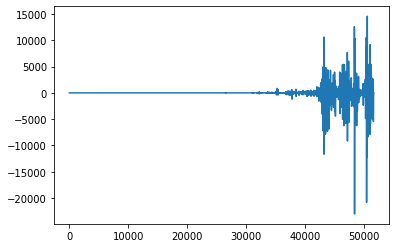

In [42]:
plt.plot(df['Dolartoday'].diff().diff())

In [44]:
adfuller(df['Dolartoday'].diff().dropna())

(-26.262424698001595,
 0.0,
 58,
 51517,
 {'1%': -3.4304769411235925,
  '5%': -2.861596105406013,
  '10%': -2.566799863045707},
 719943.0314193827)

In [45]:
important_features2 = []
less_important_features2 = []
for i in feature_list:
    if y_stat.corr(df[i])>.6:
        important_features2.append(i)
    else:
        less_important_features2.append(i)

In [46]:
important_features2

[]